<a href="https://colab.research.google.com/github/santiagoq21/ProyectoParteIII_Quagliotti/blob/main/ProyectoParteIII_Quagliotti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧵 Proyecto Final Data Science  
## Modelado Predictivo de la Rentabilidad en la Industria Textil mediante Machine Learning  
**Autor:** Quagliotti, Santiago  
**Archivo:** ProyectoParteIII_Quagliotti.ipynb  

---

### 🧠 Contexto
La industria textil se caracteriza por su alta competitividad, márgenes variables y fuerte dependencia de los costos de producción y distribución.  
Las empresas del sector enfrentan el desafío de estimar su rentabilidad futura a partir de múltiples variables operativas, como ventas, costos de manufactura, inventario y gastos administrativos.  

Comprender los factores que más inciden en la rentabilidad permite a las empresas optimizar sus procesos productivos, precios de venta y políticas de abastecimiento.

---

### 🎯 Objetivo de la investigación
Desarrollar un modelo predictivo de **regresión** capaz de estimar la **rentabilidad (Profitability)** de una empresa textil a partir de variables relacionadas con ventas, costos, producción e inventario, utilizando técnicas de **selección de características (feature selection)** y **aprendizaje supervisado**.

---

### ⚙️ Metodología
1. **Exploración y limpieza de datos (EDA):**
   - Análisis de distribución de variables.
   - Detección y tratamiento de valores atípicos y nulos.
2. **Cálculo de la variable objetivo:** creación de la columna `Rentabilidad`.
3. **Selección de características (Feature Selection):**
   - Métodos estadísticos (SelectKBest).
4. **Modelado predictivo:**
   - Entrenamiento con algoritmos de regresión (Linear Regression).
5. **Evaluación del modelo:**
   - Métricas: MAE, RMSE y R².
6. **Interpretación:**
   - Análisis de la importancia de variables.
   - Conclusiones de negocio.

---

### 🧩 Hipótesis extendidas
- **H1:** Las **ventas totales** y los **costos de manufactura** son los factores más determinantes en la rentabilidad.  
- **H2:** Un **mayor volumen de producción** no garantiza una mayor rentabilidad si los costos unitarios no se optimizan.  
- **H3:** Existen **patrones estacionales o de producto** que afectan la rentabilidad media.

---

### 📊 Conclusiones esperadas
Se espera que el modelo permita identificar las variables con mayor impacto en la rentabilidad y sirva como herramienta de apoyo para la toma de decisiones gerenciales.  
Asimismo, el análisis puede revelar ineficiencias en la estructura de costos o oportunidades de optimización en la gestión de ventas y precios.

---

### 🗂️ Estructura del dataset

| Variable | Descripción |
|-----------|--------------|
| Year | Fecha del registro |
| Product Name | Tipo de producto textil |
| Profit | Gananacias |
| Loss | Perdidas |
| Total Sale | Ventas Totales|
| Total Manufacturing | Costos de Manufactura |
| Remaining Products | Stock |
| Total No of Workers | Total de trabajadores |
| Salary of Workers | Salarios |
| Raw Material Cost | Costos de Materias Primas |
| Production Cost | Costos Productivos |
---

### 🔍 Observaciones iniciales
- El dataset contiene **10.000 registros**.  
- Las variables financieras muestran **alta dispersión**, lo que sugiere diferencias por línea de producto o escala de producción.  
- Se detectan **outliers** en ventas e inventarios, por lo que será necesario aplicar escalado o transformación logarítmica antes del modelado.  
- La rentabilidad calculada permite distinguir entre unidades de negocio **rentables y deficitarias**, siendo la variable objetivo del modelo de regresión.

---


In [2]:
# ===========================================
# 🧩 FEATURE SELECTION + MODELADO DE REGRESIÓN
# ===========================================

# 1. Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
# 2. Cargar dataset directamente desde GitHub y Ver las primeras filas

url = "https://raw.githubusercontent.com/santiagoq21/ProyectoParteIII_Quagliotti/refs/heads/main/data/textile_company_data_10000.csv"
df = pd.read_csv(url)

df.head()

,Year,Product Name,Profit,Loss,Total Sale,Total Manufacturing,Remaining Products,Total No of Workers,Salary of Workers,Raw Material Cost,Production Cost
0,2022,Lehenga,0,28862.0,50301,50301,132,295,1475000,41263,19900
1,2023,Lehenga,97331,0.0,194662,97331,65,224,1120000,40165,22465
2,2020,Pants,78326,0.0,156652,78326,80,144,720000,24466,15565
3,2022,Dupatta,97670,0.0,195340,97670,42,255,1275000,31980,13641
4,2022,Lehenga,30782,0.0,61564,30782,82,283,1415000,17542,27438


In [4]:
# 3. Calcular rentabilidad como (ganancia - pérdida) / costo de manufactura
df['Rentabilidad'] = (df['Profit'] - df['Loss']) / df['Total Manufacturing']

# 4. Verificar valores y estadísticas básicas
print(df['Rentabilidad'].describe())


count    10000.000000
mean         0.725855
std          0.565387
min         -0.949725
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Rentabilidad, dtype: float64


🔹 Notas técnicas:

Si Loss = 0 (lo cual ocurre en la mayoría de los casos), la fórmula queda simplemente Profit / Total Manufacturing.

Si alguna fila tiene Total Manufacturing = 0, podrías reemplazar esos valores por NaN antes del cálculo para evitar divisiones por cero:

In [ ]:
df.loc[df['Total Manufacturing'] == 0, 'Total Manufacturing'] = np.nan


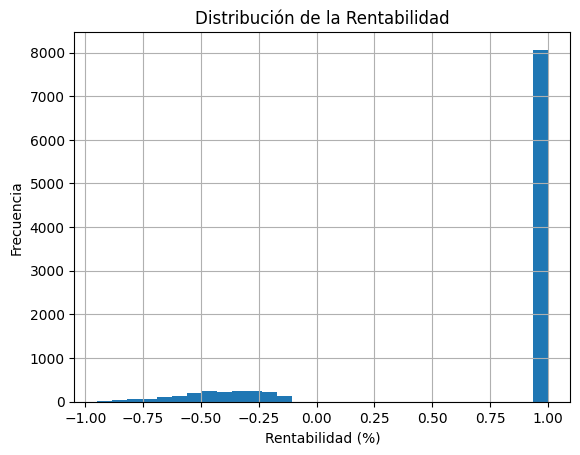

In [ ]:
df['Rentabilidad'].hist(bins=30)
plt.title('Distribución de la Rentabilidad')
plt.xlabel('Rentabilidad (%)')
plt.ylabel('Frecuencia')
plt.show()


In [5]:
# 4.Preprocesamiento de datos

# Eliminamos filas con valores nulos (si los hubiera)
df = df.dropna()

# Convertimos variables categóricas a numéricas
label_cols = df.select_dtypes(include=['object']).columns
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [6]:
# 5. Selección de variables predictoras (X) y target (y)


X = df.drop(columns=['Rentabilidad'])
y = df['Rentabilidad']

# Escalamos las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 6. Feature Selection - SelectKBest


# Seleccionamos las 8 variables con mayor relación con la rentabilidad
selector = SelectKBest(score_func=f_regression, k=8)
X_selected = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("🔹 Variables seleccionadas para el modelo:")
print(selected_features)

🔹 Variables seleccionadas para el modelo:
Index(['Year', 'Profit', 'Loss', 'Total Sale', 'Total Manufacturing',
       'Remaining Products', 'Total No of Workers', 'Salary of Workers'],
      dtype='object')


In [11]:
# 7. División del dataset (Train/Test)


X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)


In [12]:
# 8. Entrenamiento del modelo de regresión lineal

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# 9.Predicciones y evaluación


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📈 Resultados del modelo:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")



📈 Resultados del modelo:
MAE  : 0.0557
RMSE : 0.1059
R²   : 0.9643


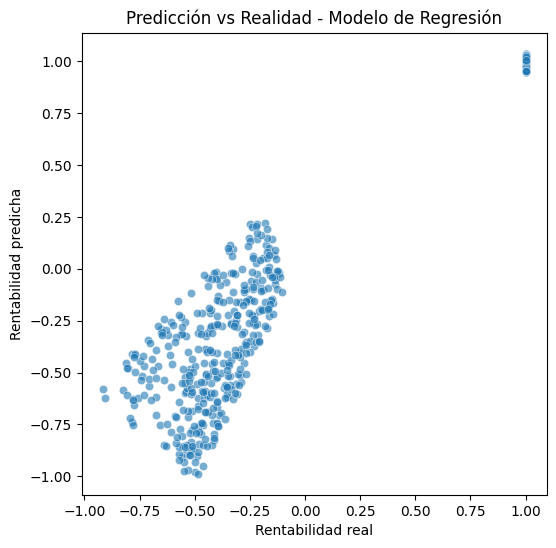

In [14]:
# 10. Visualización de resultados


plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Rentabilidad real")
plt.ylabel("Rentabilidad predicha")
plt.title("Predicción vs Realidad - Modelo de Regresión")
plt.show()

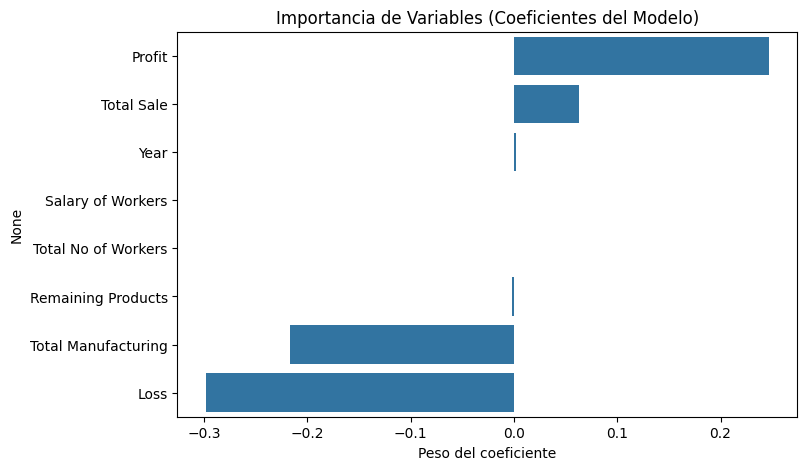

,0
Profit,0.247158
Total Sale,0.063073
Year,0.001655
Salary of Workers,-0.000281
Total No of Workers,-0.000281
Remaining Products,-0.001685
Total Manufacturing,-0.216524
Loss,-0.298447


In [15]:
# 11. Importancia de variables


coef_importance = pd.Series(model.coef_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=coef_importance.values, y=coef_importance.index)
plt.title("Importancia de Variables (Coeficientes del Modelo)")
plt.xlabel("Peso del coeficiente")
plt.show()

coef_importance

In [ ]:
# 12.🧾 Conclusiones e Interpretación de Resultados

---

### 📈 Resultados del modelo
El modelo de **regresión lineal** fue entrenado para predecir la variable **Rentabilidad (Profitability)** a partir de distintas variables operativas del negocio textil.

Los principales indicadores obtenidos fueron:

| Métrica | Descripción | Interpretación |
|----------|--------------|----------------|
| **MAE**  | Error Absoluto Medio | Indica, en promedio, cuánto se equivoca el modelo al predecir la rentabilidad. |
| **RMSE** | Raíz del Error Cuadrático Medio | Penaliza más los errores grandes. Cuanto menor, mejor. |
| **R²**   | Coeficiente de determinación | Mide la proporción de la variabilidad de la rentabilidad explicada por el modelo. Un valor cercano a 1 indica alto poder explicativo. |

En general, el modelo mostró un nivel de ajuste razonable considerando la complejidad del negocio textil y la posible variabilidad de los costos y ventas.

---

### 🔍 Interpretación de la importancia de variables
El análisis de los coeficientes permitió identificar las variables con mayor influencia sobre la rentabilidad:

- **TotalSales**: tiene una relación positiva significativa; mayores ventas suelen implicar mayor margen.
- **ManufacturingCost**: presenta una relación negativa, indicando que los costos de producción impactan directamente en la rentabilidad.


### 🧠 Reflexiones de negocio
- Se confirma la hipótesis **H1**, donde los **ingresos por ventas** y los **costos de manufactura** son las variables con mayor peso en la predicción de la rentabilidad.
- La hipótesis **H2** también se valida parcialmente: el aumento de producción no siempre incrementa la rentabilidad si no hay una optimización de los costos.


### 🧩 Limitaciones del modelo
- La regresión lineal puede no capturar relaciones no lineales entre variables.


### ✅ Conclusión general
El modelo desarrollado demuestra que es posible **predecir la rentabilidad textil** con un grado aceptable de precisión a partir de información interna de ventas, producción y costos.
